
## Data load


In [2]:
import pandas as pd
train_X = pd.read_csv('./data/train.csv')
test_X = pd.read_csv('./data/test.csv')
print(train_X.shape, test_X.shape)

train_X.head()
# PassengerId	Survived	Pclass	Name	Sex	Age	SibSp	Parch	Ticket	Fare	Cabin	Embarked

# test_X.head()
# PassengerId	Pclass	Name	Sex	Age	 SibSp	Parch	Ticket	Fare	Cabin	Embarked

(891, 12) (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt



## Pclass column EDA

 - 예측: 클래스에 따라서 생존률에 큰 차이가 있을 것으로 예측된다. 중요한 feature가 될 것으로 생각한다. 

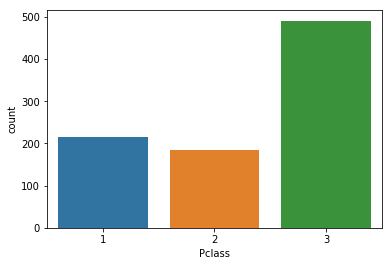

In [6]:

# 먼저 Pclass의 분포를 확인하고자한다. 
# pClass 3의 분포는 확연하게 많았음을 확인할 수 있었다. 
sns.countplot(data=train_X, x="Pclass")

### Pclass에 따른 생존유무 EDA

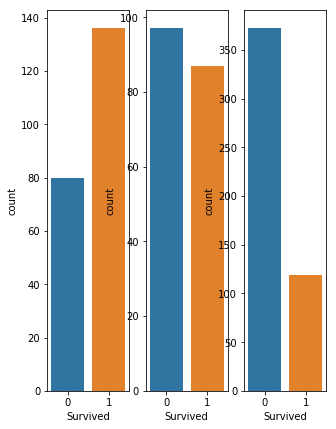

In [52]:

pclass_list = train_X["Pclass"].value_counts().index
figure, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(5, 7)

sns.countplot(data=train_X[train_X["Pclass"]==1], x="Survived", ax=ax1)
sns.countplot(data=train_X[train_X["Pclass"]==2], x="Survived",ax= ax2)
sns.countplot(data=train_X[train_X["Pclass"]==3], x="Survived",ax= ax3)

1. 1등급 클래스일수록 많이 살아남았고, 그 다음이 2등급, 3등급 순서가 되었다.
2. 따라서 좌석 등급은 중요한 feature가 될 수 있음을 알게 되었다. 

## Sex column EDA  

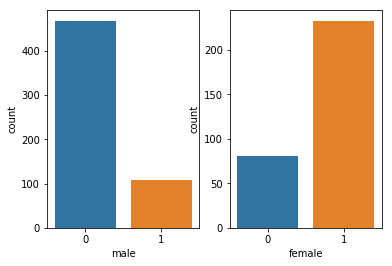

In [78]:
sex_list = train_X["Sex"].value_counts().index
figure, axes = plt.subplots(nrows=1, ncols=2)

for idx, sex in enumerate(sex_list):
    sns.countplot(data=train_X[train_X["Sex"]==sex], x="Survived",ax= axes[idx])
    axes[idx].set(xlabel = sex)


> 1. 의외로 여자가 더 많이 살아남았음을 확인 할 수 있었다. 
> 2. 성별 또한 생존유무를 파악하는데 있어서 중요한 feature가 될 것 같다.

## Age column EDA
- 나이 구간 대에 따라 생존률이 다르게 나타날 것을 예측됨.

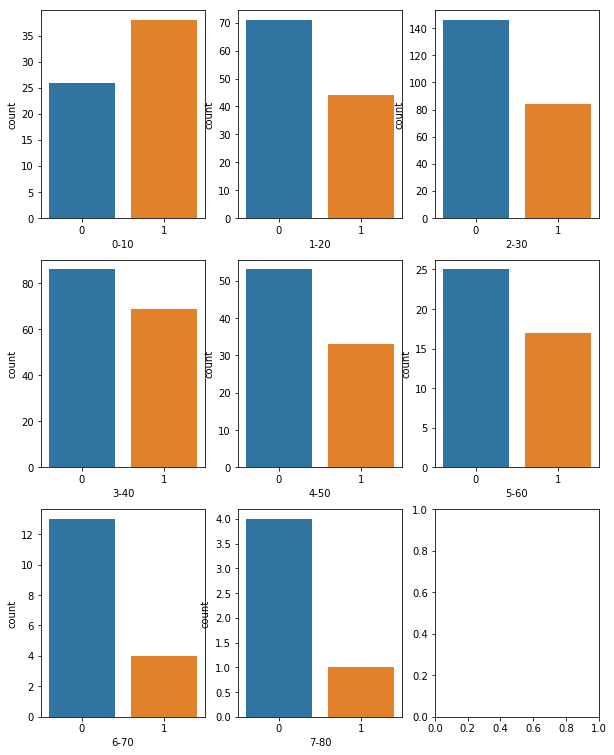

In [145]:
max_age = train_X["Age"].max()
min_age = train_X["Age"].min()

figure, axes = plt.subplots(nrows=3, ncols=3)
figure.set_size_inches(10, 13)

for i in range(0,3):
    for j in range(0,3):
        index  = i *3 + j
        ax = axes[i][j]
        data = train_X[(train_X["Age"]>index*10) & (train_X["Age"] <= (index+1)*10)]
        
        if len(data) > 0:
            sns.countplot(data= data, x= "Survived",ax = ax)
            ax.set(xlabel = str(index)+ '-' + str((index+1) *10))

1. 영유아 나이대에서 사망자 대비 생존자가 유독 극명하게 높은 것을 확인 할 수 있었다. 

## sibsp column EDA

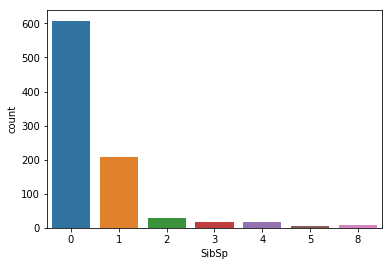

In [189]:
sns.countplot(data=train_X , x= "SibSp")

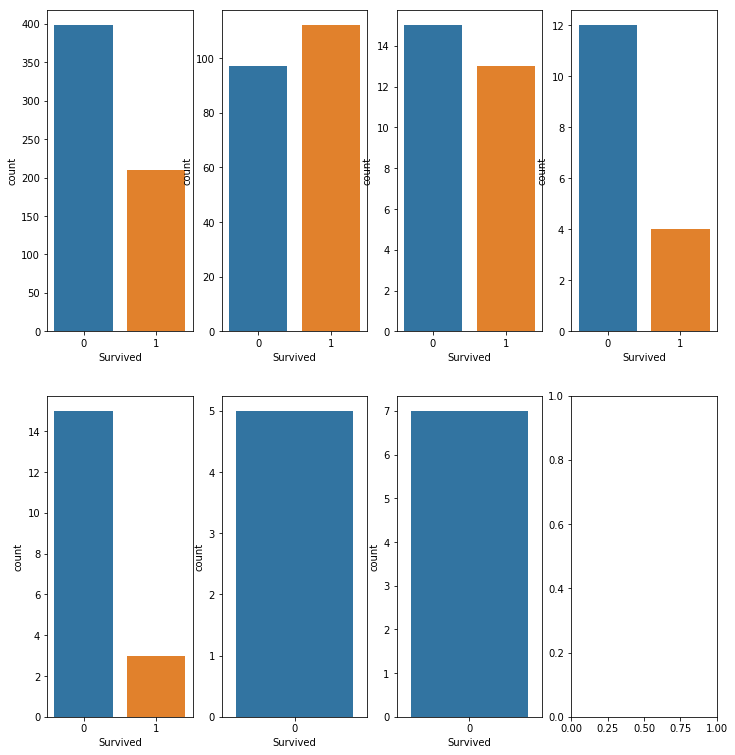

In [188]:
sibsp_list = train_X["SibSp"].value_counts().index
figure, axes= plt.subplots(nrows=2, ncols=4)

figure.set_size_inches(12,13)
sibsp_list = sibsp_list.sort_values()

for i in range(2):
    for j in range(4):
        index = 4*i + j
        if index < len(sibsp_list):
            sns.countplot(data = train_X[train_X["SibSp"] == sibsp_list[index]], x="Survived", ax = axes[i][j])

> 함께 탑승한 배우자, 형제 자매 수
1. 1명과 동반한 사람이 생존률이 높았다. 
2. 1명이상부터 총 동승자 수와 사망률이 비례하는 것을 확인 할 수 있었다.

## Parch column EDA

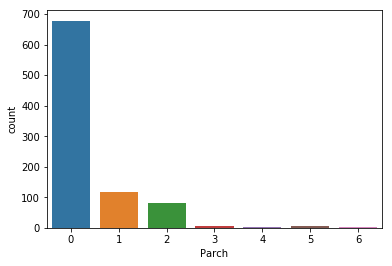

In [192]:
sns.countplot(data= train_X, x="Parch")

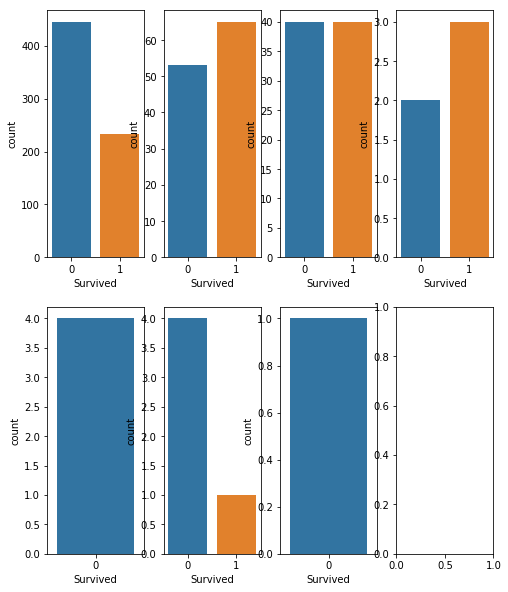

In [215]:
parch_list = train_X["Parch"].value_counts().index
parch_list = parch_list.sort_values()
figure, axes= plt.subplots(nrows=2, ncols=4)

figure.set_size_inches(8,10)

for i in range(2):
    for j in range(4):
        index = 4*i + j
        if index < len(parch_list):
            sns.countplot(data = train_X[train_X["Parch"] == parch_list[index]], x="Survived", ax = axes[i][j])

- 1,2,3명의 부모,자녀와 함께 탑승한 일행의 생존률이 높음을 확인 할 수 있었다.  

### Parch column과 Sibsp column의 수를 더하여 함께 동반한 가족 수를 새로운 column으로 구성하여 구해본다.

In [293]:
train_X["total_party"] = train_X["Parch"]+train_X["SibSp"]
total_party = train_X["total_party"].value_counts().index
total_party = total_party.sort_values()

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 10], dtype='int64')


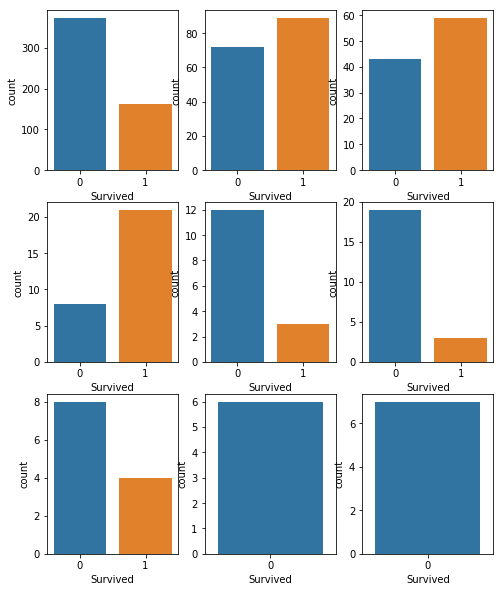

In [294]:
figure, axes= plt.subplots(nrows=3, ncols=3)

figure.set_size_inches(8,10)

for i in range(3):
    for j in range(3):
        index = 3*i + j
        if index < len(total_party):
            sns.countplot(data = train_X[train_X["total_party"] == total_party[index]], x="Survived", ax = axes[i][j])


In [286]:
train_X["Parch"].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    2
9    0
Name: Parch, dtype: int64

## Embarked attribute EDA

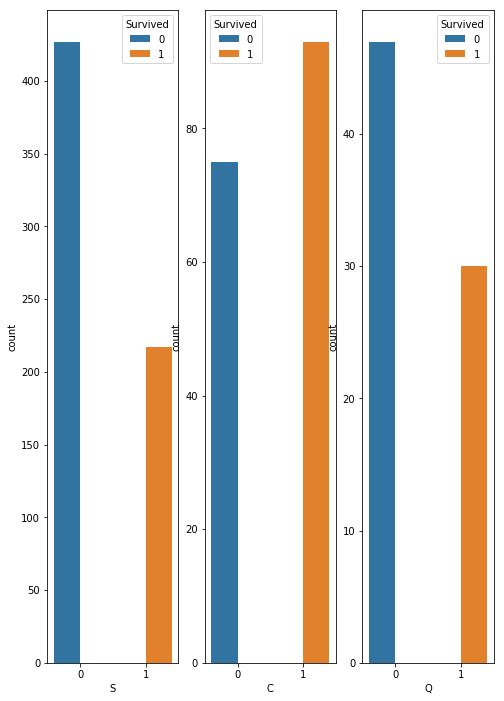

In [282]:
embarked_list = train_X["Embarked"].value_counts().index
figure , axes = plt.subplots(1,3)
figure.set_size_inches(8,12)

for i,embarked in enumerate(embarked_list):
        sns.countplot(data=train_X[train_X["Embarked"] == embarked], x= "Survived", ax = axes[i],hue="Survived")
        plt.xlabel(embarked)
        axes[i].set_xlabel(embarked)

1. C 탑승 항구를 탑승한 승객이 좀 더 살아남을 확률이 높았음을 확인 할 수 있었다. 